In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

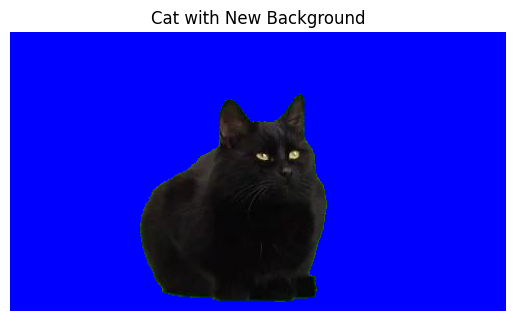

In [2]:
# Función para mostrar la imagen
def show_image(image, title="Image"):
    # Convertir la imagen de BGR a RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Cargar la imagen
image_path = "cat.jpg"
image = cv2.imread(image_path)

# Convertir la imagen a espacio de color HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir el rango de colores para el fondo verde
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Crear una máscara para el fondo verde
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invertir la máscara para obtener el gato
mask_inv = cv2.bitwise_not(mask)

#Crear una imagen de fondo del nuevo color (por ejemplo, azul)
new_background_color = [255, 0, 0]  # BGR para azul
background = np.full_like(image, new_background_color)

#Aplicar la máscara para extraer el fondo y el gato
background_masked = cv2.bitwise_and(background, background, mask=mask)
cat_masked = cv2.bitwise_and(image, image, mask=mask_inv)

#Combinar el gato con el nuevo fondo
final_image = cv2.add(background_masked, cat_masked)

#Mostrar la imagen resultante 
show_image(final_image, title="Cat with New Background")

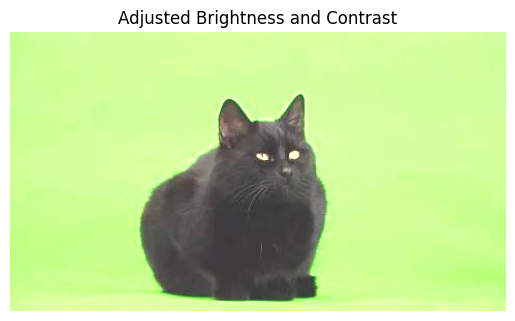

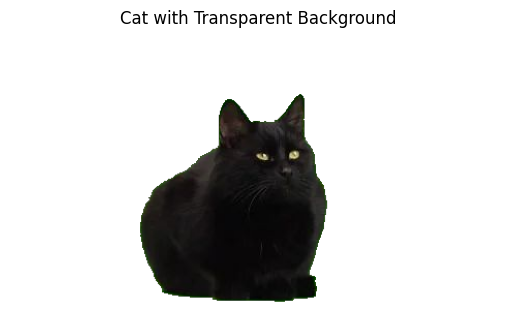

In [3]:
#Punto 2A: Ajuste de brillo y contraste
def adjust_brightness_contrast(image, alpha, beta):
    # Ajuste de brillo y contraste
    new_image = np.clip(alpha * image + beta, 0, 255).astype(np.uint8)
    return new_image

#Ajustar el brillo y el contraste
alpha = 1.5  #Factor de contraste
beta = 50    #Valor de brillo
adjusted_image = adjust_brightness_contrast(image, alpha, beta)

# Mostrar la imagen con brillo y contraste ajustados en el notebook
show_image(adjusted_image, title="Adjusted Brightness and Contrast")

#Punto 2B: Guardar el gato con fondo transparente
#Convertir la máscara invertida a 3 canales
mask_inv_3channel = cv2.merge([mask_inv, mask_inv, mask_inv])

#Aplicar la máscara para obtener solo el gato
cat = cv2.bitwise_and(image, mask_inv_3channel)

#Crear el canal alfa para la transparencia
alpha_channel = mask_inv
cat_rgba = cv2.merge([cat[:, :, 0], cat[:, :, 1], cat[:, :, 2], alpha_channel])

#Mostrar el gato con fondo transparente
plt.imshow(cv2.cvtColor(cat_rgba, cv2.COLOR_BGRA2RGBA))  
plt.title("Cat with Transparent Background")
plt.axis('off')
plt.show()

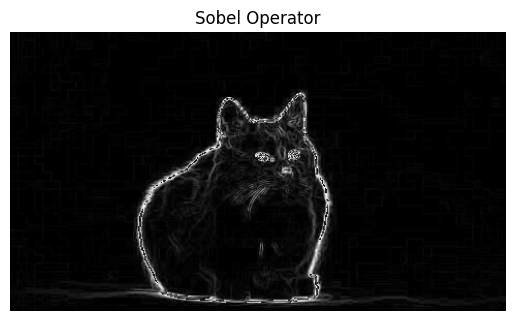

In [4]:
# Punto 3: Aplicar el operador Sobel
def apply_sobel_operator(image):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Aplicar el operador Sobel en la dirección X
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    
    #Aplicar el operador Sobel en la dirección Y
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    #Calcular la magnitud del gradiente
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    
    #Normalizar la imagen resultante
    sobel_combined = np.uint8(np.absolute(sobel_combined))
    
    return sobel_combined

#Aplicar el operador Sobel
sobel_image = apply_sobel_operator(image)

#Mostrar la imagen resultante del operador Sobel
plt.imshow(sobel_image, cmap='gray')
plt.title("Sobel Operator")
plt.axis('off')
plt.show()